In [316]:
import datetime
from datetime import datetime
import os,sys


In [317]:
print("Welcome Rajeev")

Welcome Rajeev


### project is on car mpg


In [318]:
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [320]:

import matplotlib.style
plt.style.use('classic')


In [321]:
mpg_df= pd.read_csv('car-mpg (1).csv')


In [322]:
mpg_df.shape, mpg_df.size,mpg_df.columns

((398, 10),
 3980,
 Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
        'car_name'],
       dtype='object'))

In [323]:
mpg_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
21,24.0,4,107.0,90,2430,14.5,70,2,1,audi 100 ls
252,19.2,6,231.0,105,3535,19.2,78,1,0,pontiac phoenix lj
46,22.0,4,140.0,72,2408,19.0,71,1,1,chevrolet vega (sw)
205,28.0,4,97.0,75,2155,16.4,76,3,1,toyota corolla
382,34.0,4,108.0,70,2245,16.9,82,3,1,toyota corolla


In [324]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [325]:
#car_name column has no use
mpg_df.drop(["car_name"],axis=1,inplace=True)

In [326]:
mpg_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
262,19.2,8,305.0,145,3425,13.2,78,1,0
169,20.0,6,232.0,100,2914,16.0,75,1,0
353,33.0,4,105.0,74,2190,14.2,81,2,1
345,35.1,4,81.0,60,1760,16.1,81,3,1
12,15.0,8,400.0,150,3761,9.5,70,1,0


In [327]:
print(mpg_df.origin.unique())
print(mpg_df.origin.value_counts())

[1 3 2]
origin
1    249
3     79
2     70
Name: count, dtype: int64


In [328]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})



In [329]:
mpg_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
362,24.2,6,146.0,120,2930,13.8,81,asia,0
250,19.4,8,318.0,140,3735,13.2,78,america,0
76,18.0,4,121.0,112,2933,14.5,72,europe,1
113,21.0,6,155.0,107,2472,14.0,73,america,0
262,19.2,8,305.0,145,3425,13.2,78,america,0


In [330]:
#one hot encoding for origin
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [331]:
mpg_df.sample()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
236,25.5,4,140.0,89,2755,15.8,77,1,True,False,False


In [332]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [333]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america       bool
origin_asia          bool
origin_europe        bool
dtype: object

In [334]:
# column hp is showing here object but it should be intt

In [335]:
mpg_df.sample(10)
## here can see ?

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
7,14.0,8,440.0,215,4312,8.5,70,0,True,False,False
253,20.5,6,200.0,95,3155,18.2,78,0,True,False,False
79,26.0,4,96.0,69,2189,18.0,72,1,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,1,True,False,False
370,31.0,4,112.0,85,2575,16.2,82,1,True,False,False
81,28.0,4,97.0,92,2288,17.0,72,1,False,True,False
252,19.2,6,231.0,105,3535,19.2,78,0,True,False,False
121,15.0,8,318.0,150,3399,11.0,73,0,True,False,False
137,13.0,8,350.0,150,4699,14.5,74,0,True,False,False
244,43.1,4,90.0,48,1985,21.5,78,1,False,False,True


In [336]:
import numpy as np

In [337]:
[item for item in mpg_df['hp'] if item.isdigit()==False ]
# seems there is ? some where

['?', '?', '?', '?', '?', '?']

In [338]:
mpg_df['hp']=mpg_df['hp'].replace("?",np.nan)

In [339]:
mpg_df.isnull().sum()
# 6 null for hp

mpg               0
cyl               0
disp              0
hp                6
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [340]:
## filling null value with median
# which is better mean, median mode or other technique like KNNImputer,SimpleImputer for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [341]:
## mean imputation
mpg_df['hp'].dtypes


dtype('O')

In [342]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [343]:
# hp columns median find 
mpg_df['hp'] = pd.to_numeric(mpg_df['hp'],errors ='coerce')

In [344]:
mpg_df.mean()

mpg                 23.514573
cyl                  5.454774
disp               193.425879
hp                 104.469388
wt                2970.424623
acc                 15.568090
yr                  76.010050
car_type             0.530151
origin_america       0.625628
origin_asia          0.198492
origin_europe        0.175879
dtype: float64

In [345]:
# fill nullll with mean
mean_Df = mpg_df.copy()
mean_Df['hp'].fillna(mean_Df['hp'].mean(),inplace=True) 

C:\Users\Rajeev\AppData\Local\Temp\ipykernel_7064\399219530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mean_Df['hp'].fillna(mean_Df['hp'].mean(),inplace=True)


In [346]:
mean_Df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [347]:
# filling with median()
med_df = mpg_df.copy()
med_df['hp'].fillna(med_df.hp.median(),inplace=True)

C:\Users\Rajeev\AppData\Local\Temp\ipykernel_7064\2261256555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  med_df['hp'].fillna(med_df.hp.median(),inplace=True)


In [348]:
#filling with sklearn technique
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(mpg_df)
imputed_df = pd.DataFrame(imputed_data,columns=mpg_df.columns)

imputed_df.sample(2)



,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
295,35.7,4.0,98.0,80.0,1915.0,14.4,79.0,1.0,1.0,0.0,0.0
256,20.5,6.0,225.0,100.0,3430.0,17.2,78.0,0.0,1.0,0.0,0.0


In [349]:
## filling with simple imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(mpg_df)
mpg_df = pd.DataFrame(imputed_data,columns=mpg_df.columns)


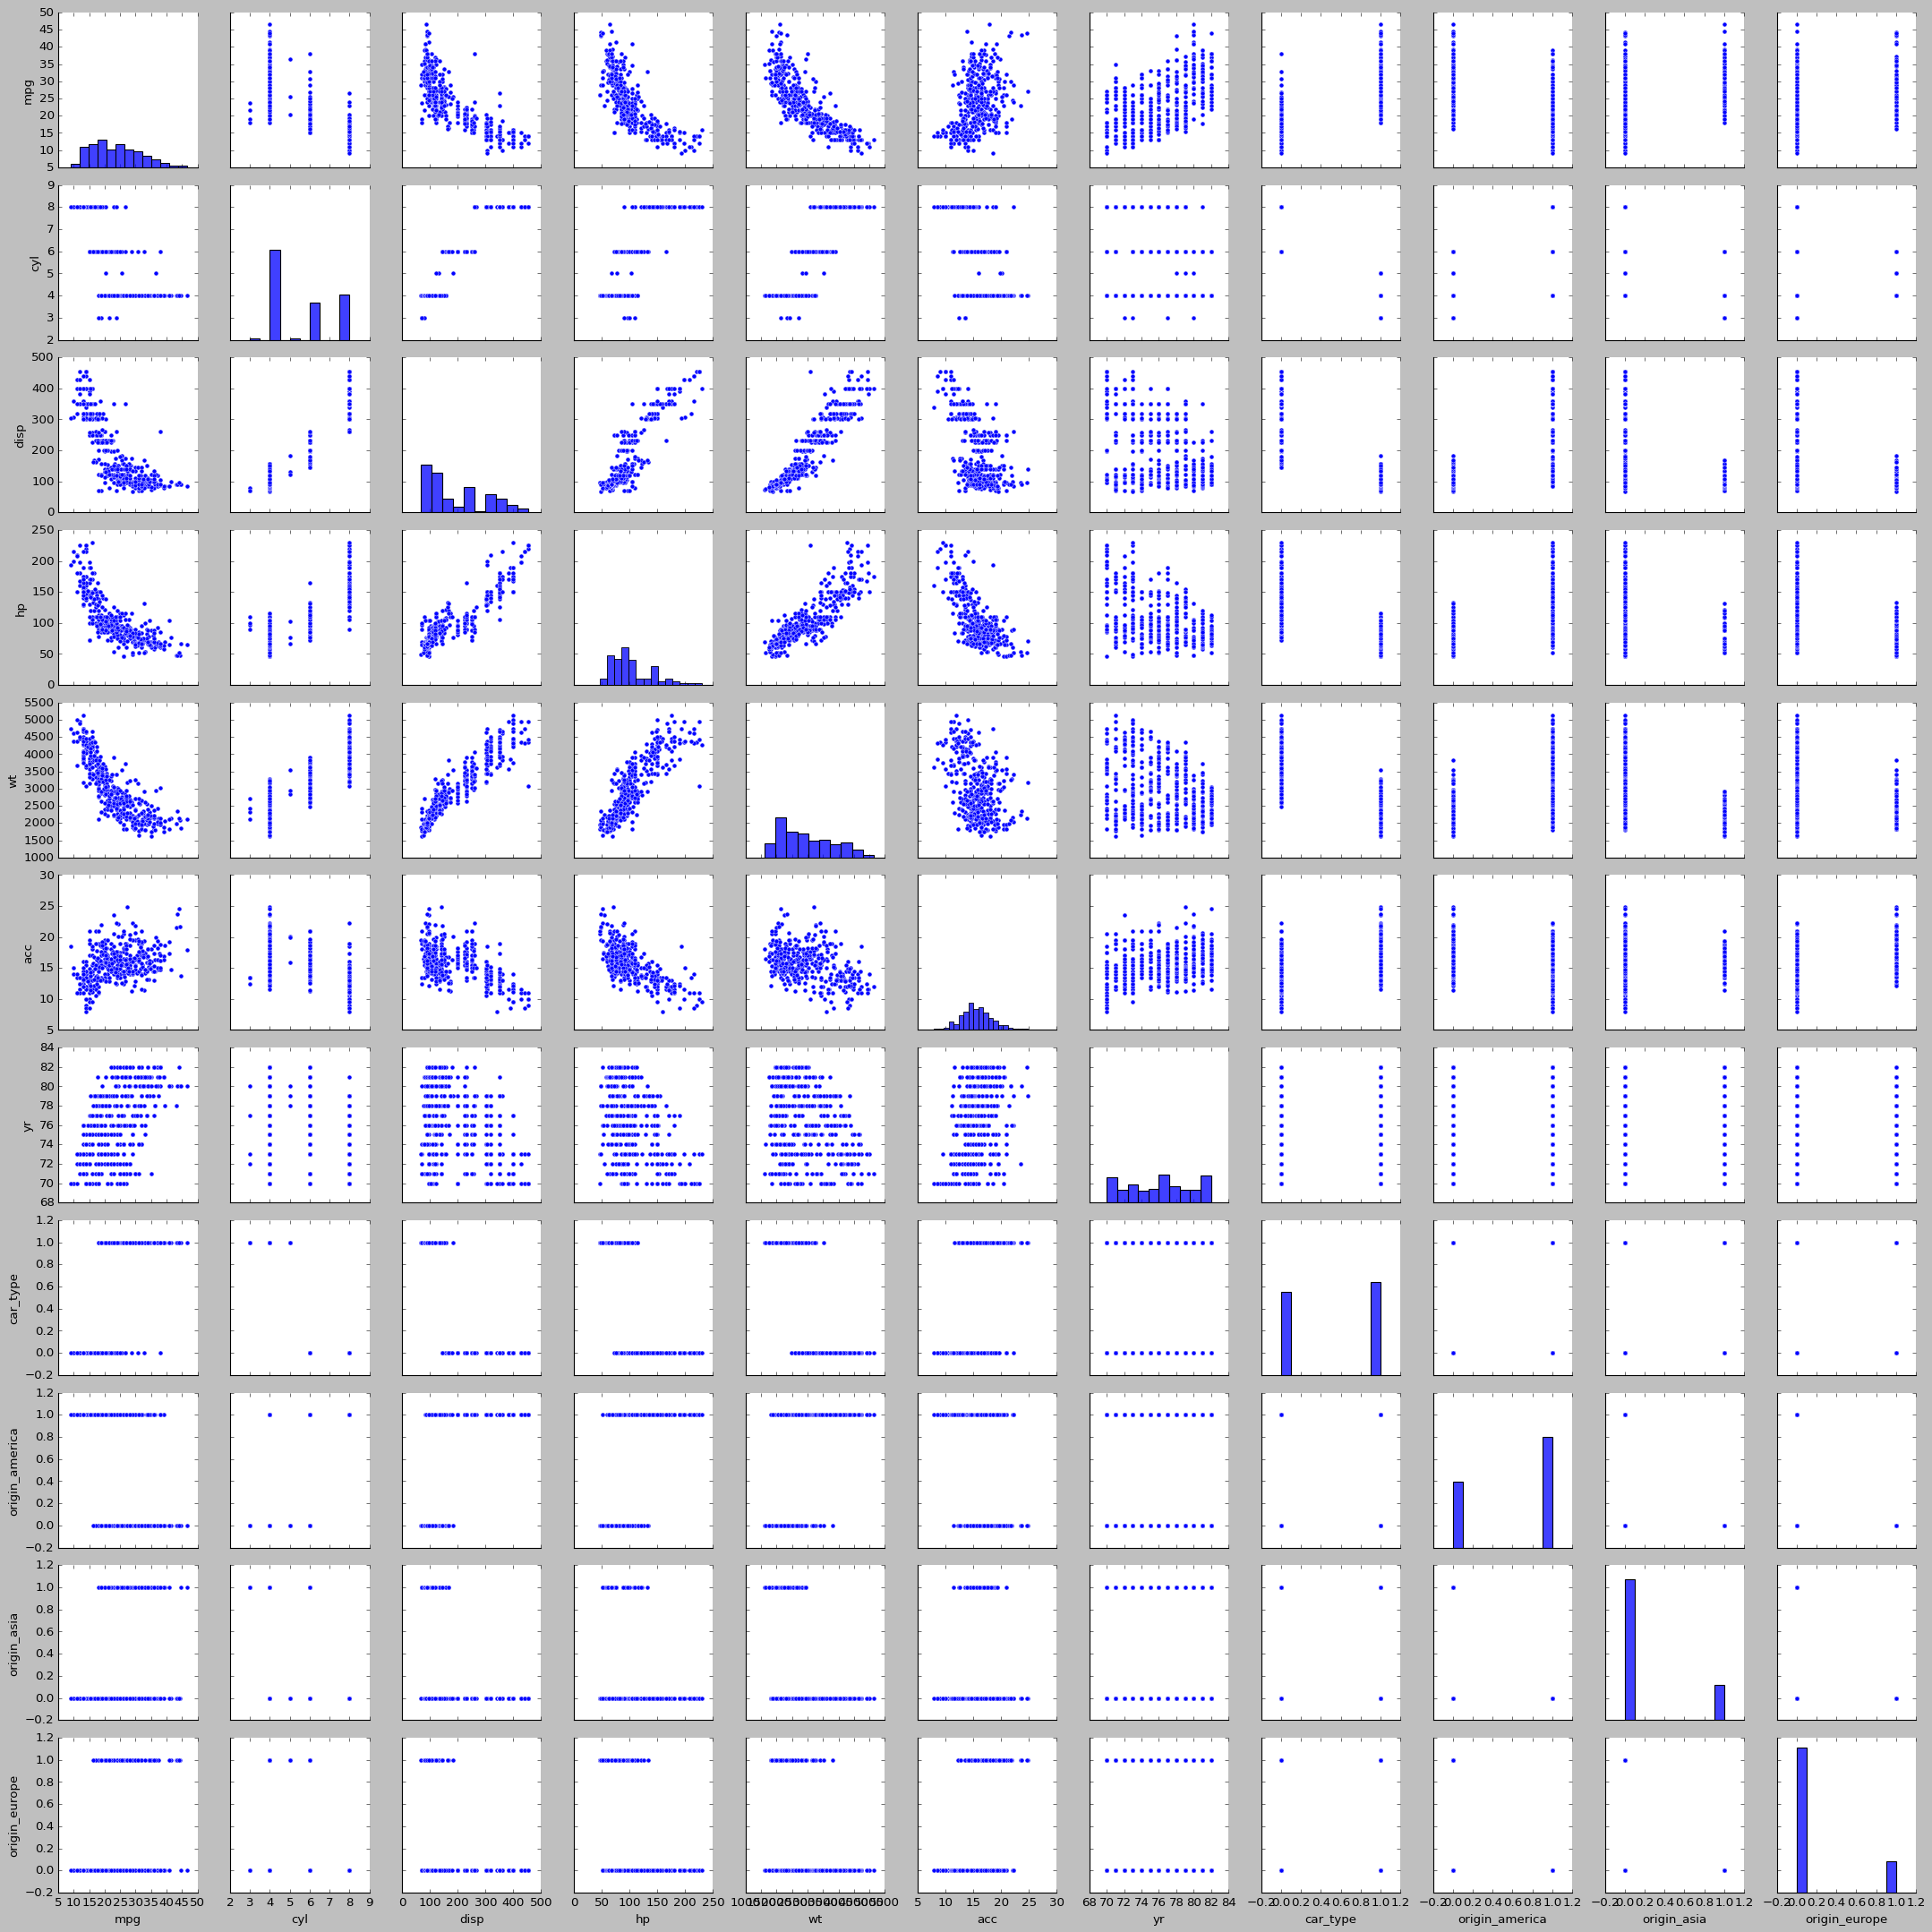

In [350]:
sns.pairplot(mpg_df)

In [351]:
# reg plot 

# columns = mpg_df.columns.tolist()
# for i in range(len(columns)):
#     for j in range(i+1, len(columns)):
#         sns.regplot(x=columns[i], y=columns[j], data= mpg_df)
#         plt.show()

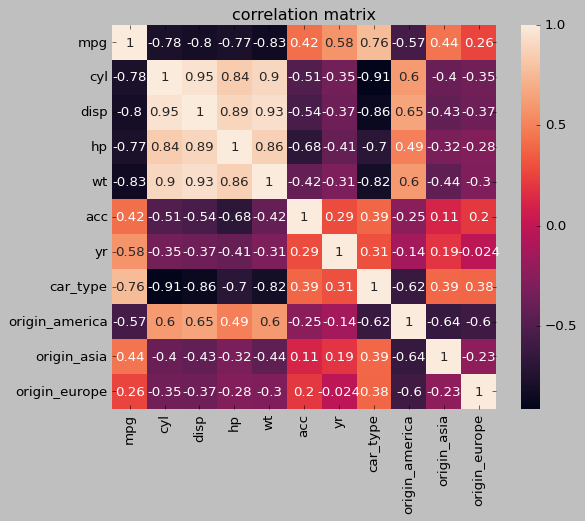

In [352]:
corr_matrix = mpg_df.corr()
sns.heatmap(corr_matrix,annot=True,square=True)
plt.title("correlation matrix")
plt.show()

In [353]:
corr_matrix

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.759207,-0.568192,0.442174,0.259022
cyl,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.912577,0.604351,-0.396479,-0.352861
disp,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.855141,0.651407,-0.433505,-0.373886
hp,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.699196,0.486083,-0.321325,-0.281258
wt,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.815445,0.598398,-0.440817,-0.298843
acc,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.385187,-0.250806,0.109144,0.204473
yr,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.305194,-0.139883,0.193101,-0.024489
car_type,0.759207,-0.912577,-0.855141,-0.699196,-0.815445,0.385187,0.305194,1.000000,-0.624215,0.392758,0.382010
origin_america,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.624215,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,0.392758,-0.643317,1.000000,-0.229895


In [354]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)
X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [355]:
mpg_df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
# stractification to maintain class balance while training and testing

In [358]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso



In [359]:
lr_ols = LinearRegression()
lr_ols.fit(X_train, y_train)


LinearRegression()

In [360]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_ols.coef_[0][idx]))

The coefficient for cyl is 1.8560750929205898
The coefficient for disp is 0.010108917010512912
The coefficient for hp is -0.03860127161497984
The coefficient for wt is -0.006432786672397502
The coefficient for acc is 0.01597282902759989
The coefficient for yr is 0.7597347722441067
The coefficient for car_type is 6.616542858644975


In [361]:
print(lr_ols.feature_names_in_)
print(lr_ols.coef_)
print(lr_ols.intercept_)
print(lr_ols.score(X_train,y_train)) ## gives coeff of determinant on training: R^2 Score
print(lr_ols.score(X_test,y_test)) ## gives coeff of determinant on testing: R^2 Score


['cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'car_type']
[[ 1.85607509e+00  1.01089170e-02 -3.86012716e-02 -6.43278667e-03
   1.59728290e-02  7.59734772e-01  6.61654286e+00]]
[-26.79576274]
0.8258697117294276
0.8402202886756795


In [362]:
pred_ = lr_ols.predict(X_test)

In [363]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [364]:
mse = mean_squared_error(pred_,y_test)
mae = mean_absolute_error(pred_,y_test)
print("mse: {}".format(mse))
print(f"mae: {mae}")

mse: 9.34183106151588
mae: 2.4355520282630496


In [365]:
import statsmodels.api as sm


In [366]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4.0,105.0,63.0,2215.0,14.9,81.0,1.0,34.7
59,4.0,97.0,54.0,2254.0,23.5,72.0,1.0,23.0
120,4.0,121.0,112.0,2868.0,15.5,73.0,1.0,19.0
12,8.0,400.0,150.0,3761.0,9.5,70.0,0.0,15.0
349,4.0,91.0,68.0,1985.0,16.0,81.0,1.0,34.1


In [367]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type', data = data_train).fit()
lm1.params

Intercept   -26.795763
cyl           1.856075
disp          0.010109
hp           -0.038601
wt           -0.006433
acc           0.015973
yr            0.759735
car_type      6.616543
dtype: float64

In [368]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           1.35e-98
Time:                        14:38:05   Log-Likelihood:                -725.12
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.7958      5.581     -4.801      0.0

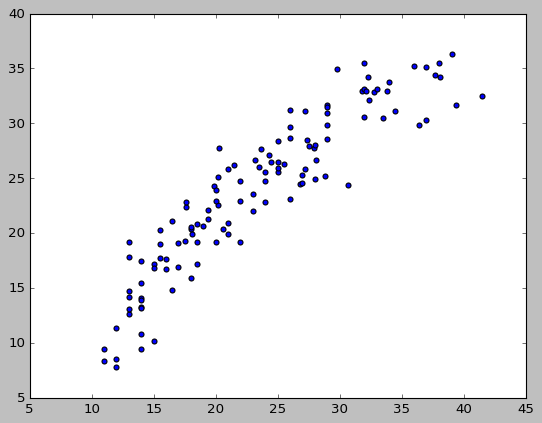

In [369]:
plt.scatter(y_test['mpg'], pred_)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

##### Model improvement

In [370]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [371]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [372]:
# invoke the LinearRegression function and find the bestfit model on training data

lr_ols = LinearRegression()
lr_ols.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [373]:
#the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_ols.coef_[0][idx]))

The coefficient for cyl is 0.3941241198875264
The coefficient for disp is 0.13112799292370408
The coefficient for hp is -0.1839442057113286
The coefficient for wt is -0.6900605792795089
The coefficient for acc is 0.005627463373054947
The coefficient for yr is 0.3560570256707283
The coefficient for car_type is 0.419138799704171


In [374]:
print(lr_ols.feature_names_in_)
print(lr_ols.coef_)
print(lr_ols.intercept_)
print(lr_ols.score(X_train_scaled,y_train_scaled)) ## gives coeff of determinant on training: R^2 Score
print(lr_ols.score(X_test_scaled,y_test_scaled)) ## gives coeff of determinant on testing: R^2 Score


['cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'car_type']
[[ 0.39412412  0.13112799 -0.18394421 -0.69006058  0.00562746  0.35605703
   0.4191388 ]]
[-2.57466551e-17]
0.8258697117294275
0.845844974058366


In [375]:
pred_ = lr_ols.predict(X_test_scaled)
mse = mean_squared_error(pred_,y_test_scaled)
mae = mean_absolute_error(pred_,y_test_scaled)
print("mse: {}".format(mse))
print(f"mae: {mae}")

## error reduces while standerising the data using zsocre

mse: 0.15415502594163394
mae: 0.30953310051412297


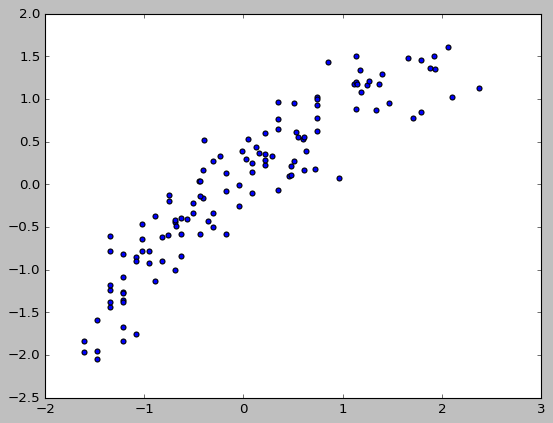

In [376]:
plt.scatter(y_test_scaled['mpg'], pred_)


In [377]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [378]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [379]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



cyl ---> 171.5165735769784
disp ---> 86.98532739502183
hp ---> 69.03210142603584
wt ---> 138.25350143052896
acc ---> 68.93692425526065
yr ---> 166.93133684680112
car_type ---> 12.912601153454622


##### save and load the model

In [388]:
# 1. using joblib
import joblib

lr_model_job= joblib.dump(lr_ols,"lr_model_job.joblib")

#load
mode_ = joblib.load("lr_model_job.joblib")

In [391]:
#2. using pikle
import pickle

#save
with open("lr_model.pkl",'wb') as f:
    pickle.dump(lr_ols,f)

#load
with open("lr_model.pkl",'rb') as f:
    model_=pickle.load(f)
